Exercise 2 - Simple Linear Regression
=====================

We want to know how to the chocolate-bar customers happier. 
Which chocolate bar _features_ predict customer happiness. For example, customers may be happier when chocolate bars are bigger, or when they contain more cocoa. 

### Step 1 open the file

In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# exercise file location. Let's open it and save it later in my folder

url = "https://raw.githubusercontent.com/MicrosoftDocs/ms-learn-ml-crash-course-python/master/Data/chocolate%20data.txt"
dataset = pd.read_csv(url, index_col=False, sep="\t",header=0)

print(dataset.head(2))

# save the file in my folder

with open('chocolate_data.txt', 'w') as f:
    f.write(dataset.to_string(header = True, index = False))

    

   weight  cocoa_percent  sugar_percent  milk_percent  customer_happiness
0     185             65             11            24                  47
1     247             44             34            22                  55


In [10]:
dataset.describe()

,weight,cocoa_percent,sugar_percent,milk_percent,customer_happiness
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,131.160000,33.820000,33.780000,32.450000,36.790000
std,74.513739,20.339234,19.026075,19.008438,14.084374
min,1.000000,0.000000,1.000000,0.000000,7.000000
25%,67.000000,17.750000,20.000000,18.000000,26.000000
50%,132.500000,34.500000,33.000000,30.500000,36.500000
75%,205.000000,45.000000,44.000000,44.000000,47.250000
max,250.000000,90.000000,75.000000,90.000000,70.000000


The data represents 100 different variations of chocolate bars and the measured customer happiness for each one. 

Step 2
--

We want to know which chocolate bar features make customers happy.

Let's run a linear regression model between __cocoa percentage__ and __happiness__.

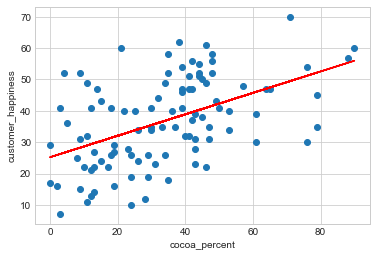

The slope of the model is 0.34160181 
The intercept of the model is 25.2370269


In [11]:
# Define a function to perform a linear regression

# From Example:
def PerformLinearRegression(formula):

    # This performs linear regression
    lm = smf.ols(formula = formula, data = dataset).fit()
    featureName=formula.split(" ")[-1]
    # get the data for the x parameter (our feature)
    train_X=dataset[featureName]
    # This makes and shows a graph
    intercept=lm.params[0]
    slope=lm.params[1]
    line = slope * train_X + intercept
    plt.plot(train_X, line, '-', c = 'red')
    plt.scatter(train_X, dataset.customer_happiness)
    plt.ylabel('customer_happiness')
    plt.xlabel(featureName)
    plt.show()
    # add some printing
    print(f'The slope of the model is {round(slope,8)} \nThe intercept of the model is {round(intercept,8)}')

PerformLinearRegression('customer_happiness ~ cocoa_percent')

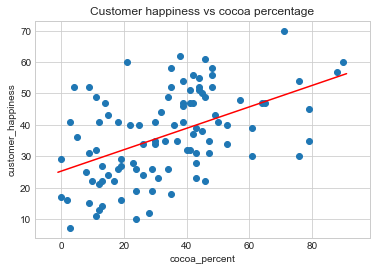

The intercept of the model is 25.2370269
The slope of the model is 0.34160181
The model score i.e. R2 is: 0.24335170829820527


In [12]:
#Luisa's version using scikit learn

from sklearn.metrics import r2_score
def Run_LM(y_var, x_var):
    fig = plt.figure()
    plt.scatter(dataset[x_var],dataset[y_var])
    plt.title('Customer happiness vs cocoa percentage')
    plt.xlabel('cocoa_percent')
    plt.ylabel('customer_happiness')
    plt.axis('equal')

    from sklearn.linear_model import LinearRegression
    model = LinearRegression(fit_intercept=True)
    y = dataset[y_var]
    x = dataset[x_var]
    X = x[:,np.newaxis] # create the feature Martix to run the model
    model.fit(X,y)
    xfit = np.linspace(min(x)-1,max(x)+1,100)
    yfit = model.predict(xfit[:,np.newaxis])
    plt.plot(xfit,yfit,'red')
    plt.show()
    
    y_prediction = model.predict(X) 
    print(f'The intercept of the model is {round(model.intercept_,8)}\nThe slope of the model is {round(model.coef_[0],8)}')
    print(f'The model score i.e. R2 is: {model.score(X,y)}')
#     print(f'Let\'s see if it\'s the same as model score: {r2_score(y,y_prediction)}')
    
Run_LM('customer_happiness','cocoa_percent')

In [13]:
# Let's see the same model using statsmodels

model = smf.ols('customer_happiness ~ cocoa_percent', data=dataset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     customer_happiness   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.52
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.84e-07
Time:                        19:52:04   Log-Likelihood:                -391.96
No. Observations:                 100   AIC:                             787.9
Df Residuals:                      98   BIC:                             793.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.2370      2.398     10.524

In [14]:
# other way to do it
import statsmodels.api as sm
x1 = dataset['cocoa_percent']
x = sm.add_constant(x1)
y = dataset['customer_happiness']
model2 = sm.OLS(y,x).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     customer_happiness   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.52
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.84e-07
Time:                        19:52:05   Log-Likelihood:                -391.96
No. Observations:                 100   AIC:                             787.9
Df Residuals:                      98   BIC:                             793.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.2370      2.398     10.524

In the scatter plot above, each point represents an observation for a single chocolate bar.

It seems that __more cocoa makes customers more happy__.

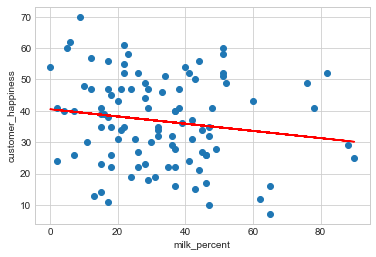

The slope of the model is -0.11502554 
The intercept of the model is 40.52257892


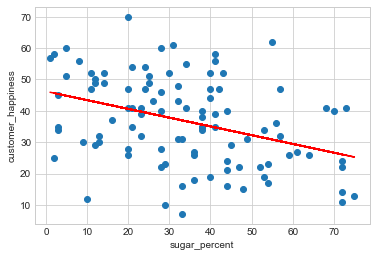

The slope of the model is -0.27905727 
The intercept of the model is 46.21655455


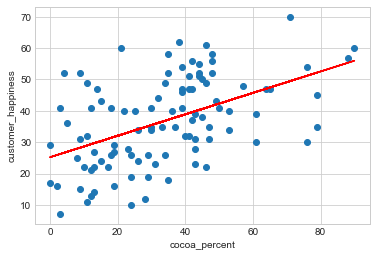

The slope of the model is 0.34160181 
The intercept of the model is 25.2370269


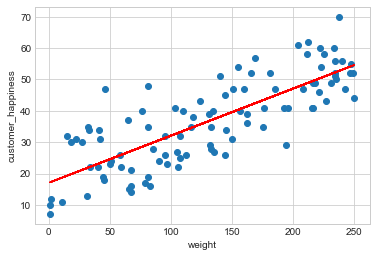

The slope of the model is 0.15015235 
The intercept of the model is 17.09601762


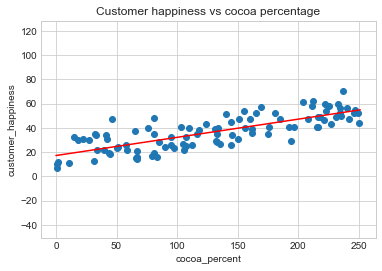

The intercept of the model is 17.09601762
The slope of the model is 0.15015235
The model score i.e. R2 is: 0.631047257389467


In [15]:

PerformLinearRegression('customer_happiness ~ milk_percent')
PerformLinearRegression('customer_happiness ~ sugar_percent')
PerformLinearRegression('customer_happiness ~ cocoa_percent')
PerformLinearRegression('customer_happiness ~ weight')
Run_LM('customer_happiness','weight')

It looks like heavier chocolate bars and the cocoa percentage make customers happier. WHereas the amount of milk or sugar show an inverse relationship.